In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Mesh quality indicators

This notebook shows different mesh quality indicators:

- Minimum/maximum angle
- Ratio min/max edge length
- Ratio circumscribed to inscribed circle (largest circle fitting inside vs smallest circle fitting around a triangle)

The indicators are plotted on the mesh and as a histogram.

In [2]:
import numpy as np
import meshio
import matplotlib.pyplot as plt
from nanomesh import metrics

In [3]:
mesh = meshio.read('mesh_x500_ascii.msh')

### Metrics

Quality metrics are available through the `metrics` submodule, for example to access the area for each face:

In [4]:
metrics.area(mesh)

array([32.56388253, 15.56364244, 10.4682266 , ..., 13.79398148,
       30.96058201, 11.25892857])

### Minumum and maximum cell angles

`nanomesh.metrics` includes convenience functions for plotting histograms and colored 2d meshes.

<IPython.core.display.Javascript object>


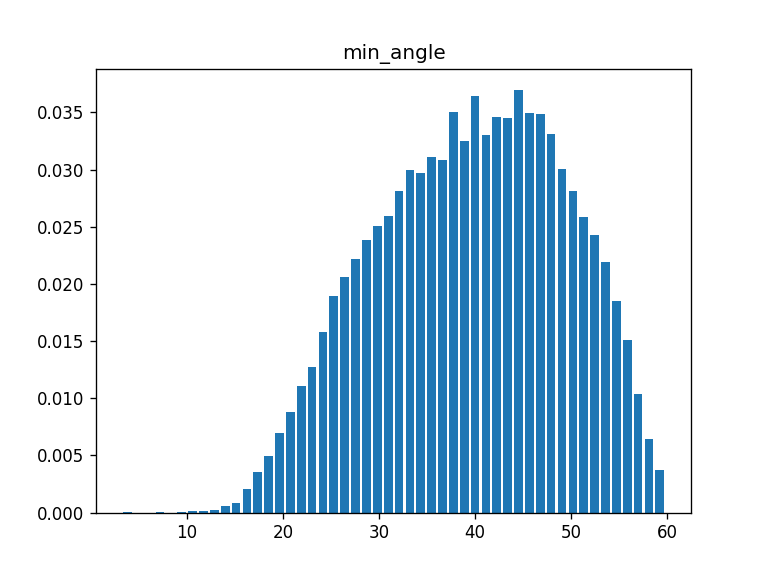

<IPython.core.display.Javascript object>


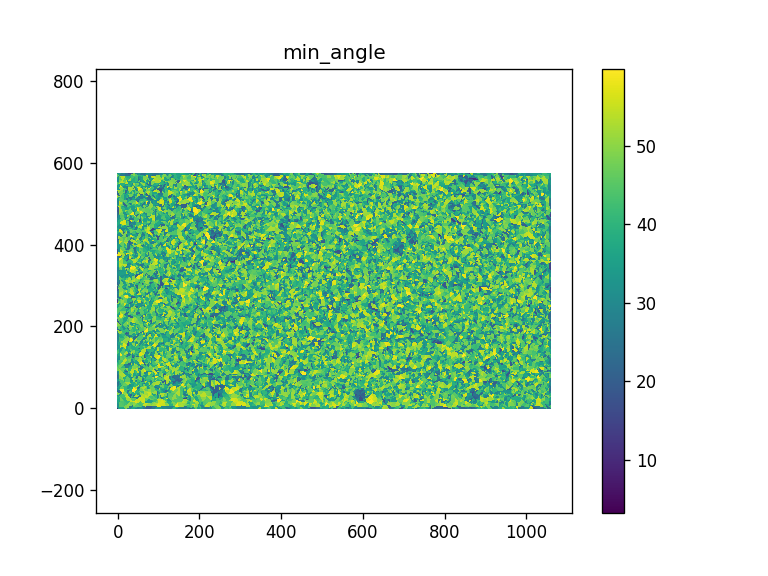

<AxesSubplot:title={'center':'min_angle'}>

In [5]:
metrics.histogram(mesh, metric='min_angle')
metrics.plot2d(mesh, metric='min_angle')

<IPython.core.display.Javascript object>


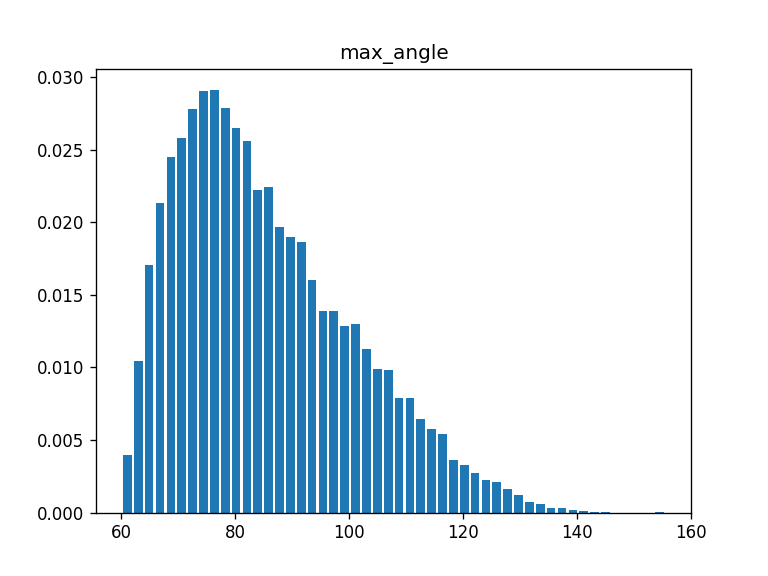

<IPython.core.display.Javascript object>


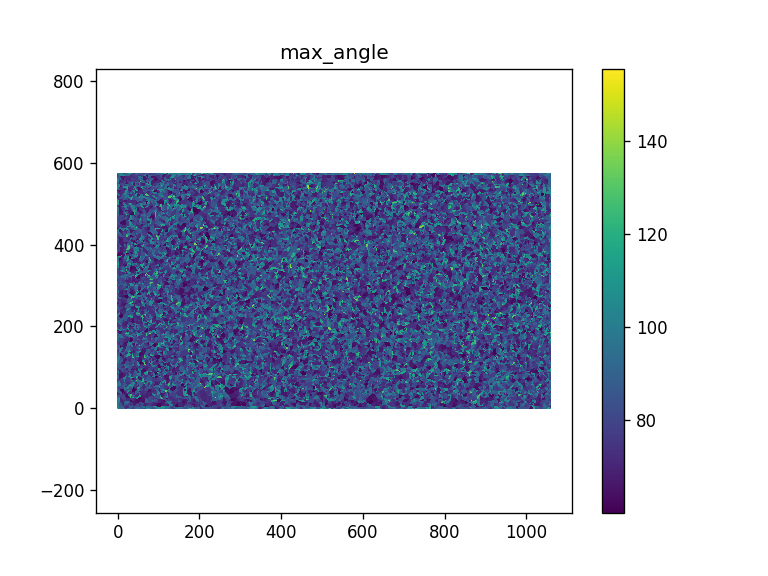

<AxesSubplot:title={'center':'max_angle'}>

In [6]:
metrics.histogram(mesh, metric='max_angle')
metrics.plot2d(mesh, metric='max_angle')

### Ratio between radii

https://www.geogebra.org/m/VRE3Dyrn

<IPython.core.display.Javascript object>


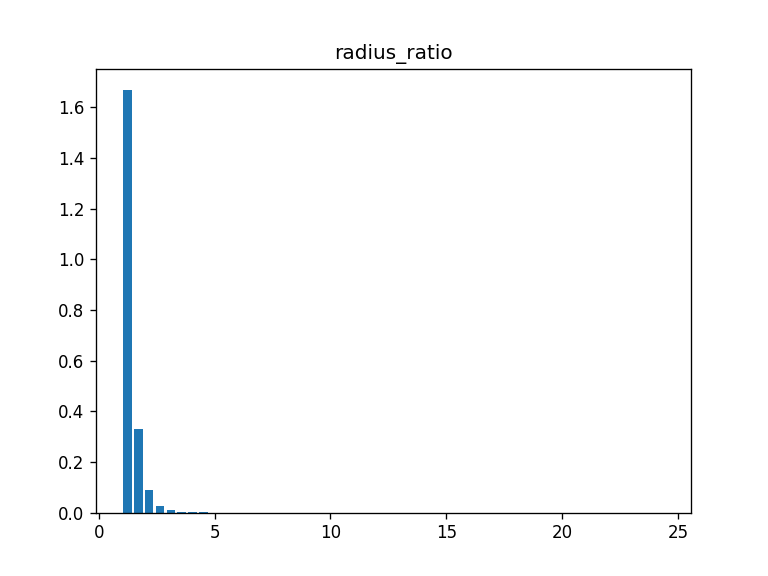

<IPython.core.display.Javascript object>


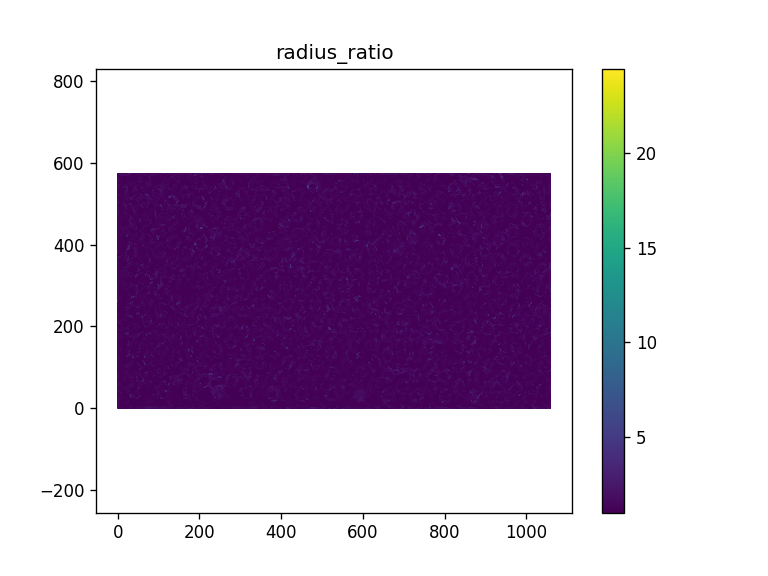

<AxesSubplot:title={'center':'radius_ratio'}>

In [7]:
metrics.histogram(mesh, metric='radius_ratio')
metrics.plot2d(mesh, metric='radius_ratio')

### Ratio between longest and shortest edge

<IPython.core.display.Javascript object>


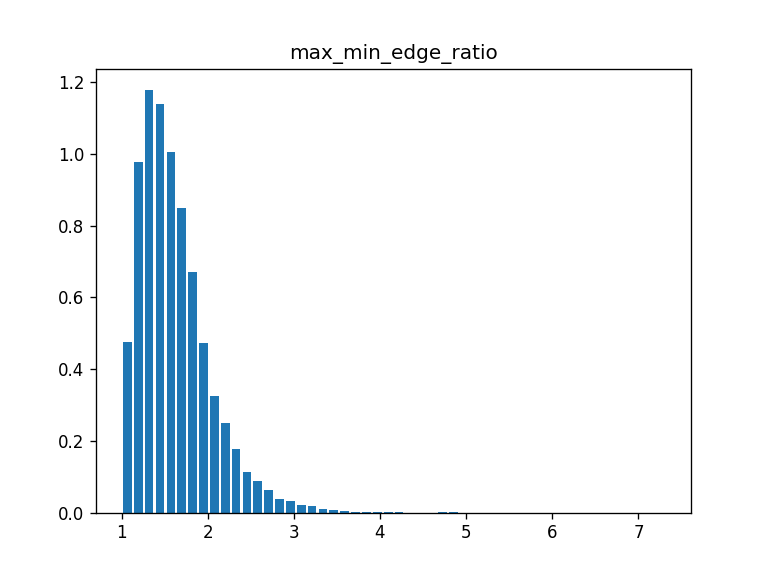

<IPython.core.display.Javascript object>


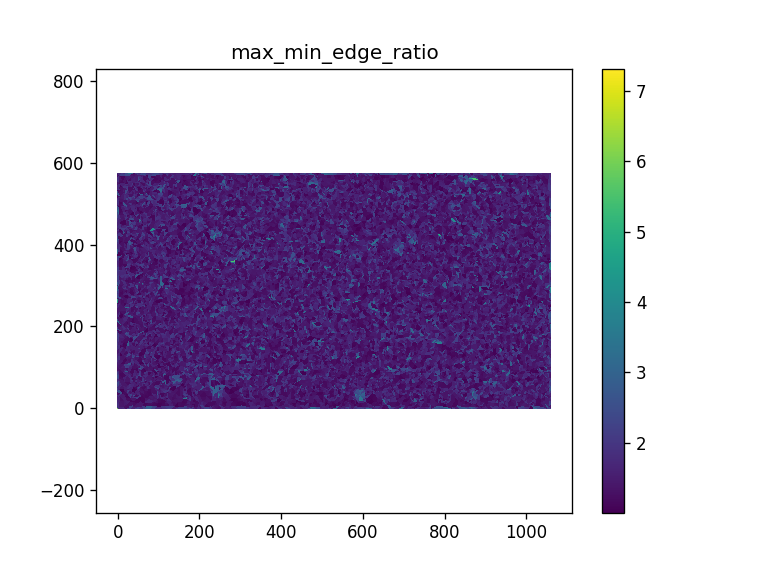

<AxesSubplot:title={'center':'max_min_edge_ratio'}>

In [8]:
metrics.histogram(mesh, metric='max_min_edge_ratio')
metrics.plot2d(mesh, metric='max_min_edge_ratio')

### Calculate and export all metrics

This way they can be viewed in another program like Paraview.

In [9]:
metrics.calculate_all_metrics(mesh, inplace=True)
mesh.write("mesh_quality.msh", file_format='gmsh22', binary=False)